In [1]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.12


In [40]:
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'account-name': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'verify': True,
  'private_endpoint': False},
 'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': '7p9bCdqlSo3nlp2FNDPGJjpLC78wxy_JJDHyzzV_dwCe',
  'instance': 'crn:v1:bluemix:public:quantum-computing:eu-de:a/624a449c58db4cebbbcd6d44cd96889e:84f0afd8-a97d-449f-ade8-8c52ea820862::',
  'verify': True,
  'private_endpoint': False},
 'my-quantum-account': {'channel': 'ibm_quantum',
  'url': 'https://auth.quantum.ibm.com/api',
  'token': 'c48268e836ab

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

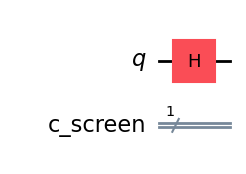

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here

double_slit.h(qr[0])
#double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')

In [9]:
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


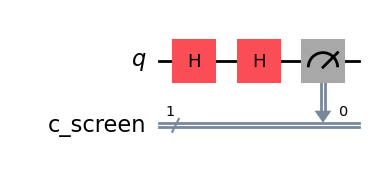

In [34]:
double_slit.h(qr[0])
double_slit.measure(qr[0], cr[0])
double_slit.draw('mpl')

In [15]:
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


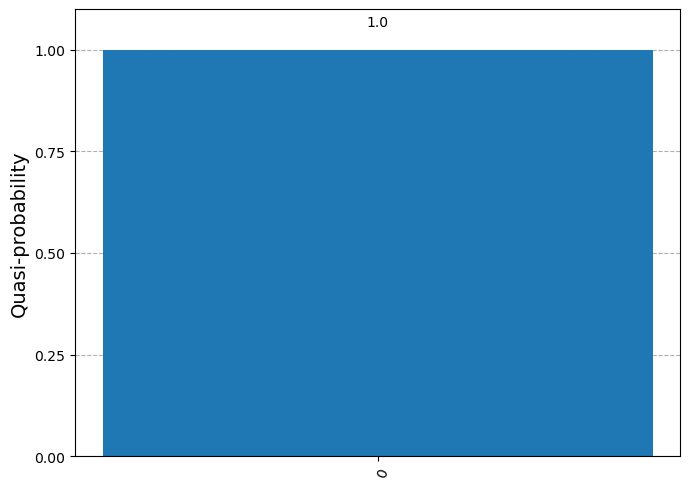

In [41]:
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

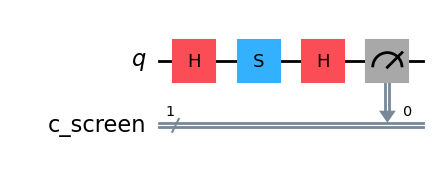

In [18]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here

double_slit_with_difference.s(0)

#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [19]:
grade_lab1_ex1_3(double_slit_with_difference)


Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


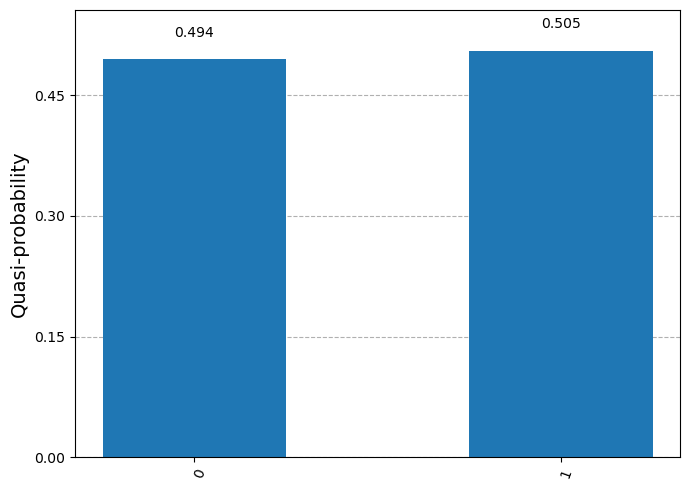

In [20]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

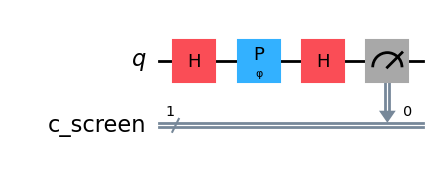

In [24]:
œÜ = Parameter('œÜ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here

double_slit_fringe.h(0)
double_slit_fringe.p(œÜ, 0)
double_slit_fringe.h(0)

double_slit_fringe.assign_parameters({œÜ: np.pi/2})
double_slit_fringe.measure(qr[0], cr[0])

#end of your code

double_slit_fringe.draw('mpl')


In [25]:
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


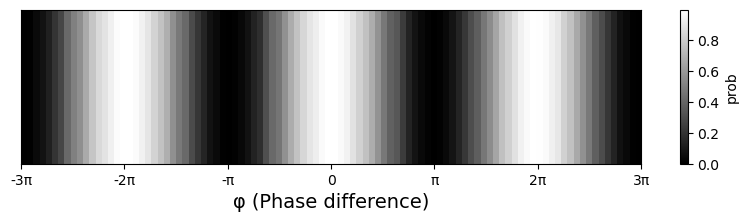

In [26]:
œÜ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

œÜ_hit = []
dist = sampler.run([(qc_isa, œÜ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(œÜ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        œÜ_hit.append(result['0']/1000)
    else:
        œÜ_hit.append(0)

#plot heat map
œÜ_hit_2d = np.array(œÜ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(œÜ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('œÜ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3œÄ', '-2œÄ', '-œÄ', '0', 'œÄ', '2œÄ', '3œÄ'])
plt.yticks([])  
plt.show()

In [46]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here

    qc.rx(theta, 0)
    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [47]:
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


In [50]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='Œ∏',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='Œ∏', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

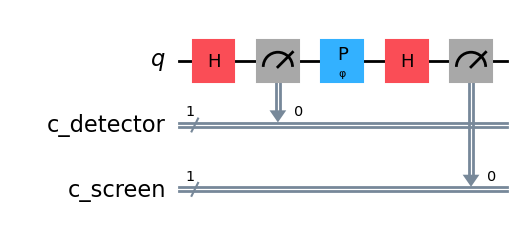

In [51]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

œÜ = Parameter('œÜ')

#your code here

double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr1[0])
double_slit_with_detector.p(œÜ, qr[0])
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0], cr2[0])

#end of your code

double_slit_with_detector.draw('mpl')

In [52]:
grade_lab1_ex3(double_slit_with_detector)


Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


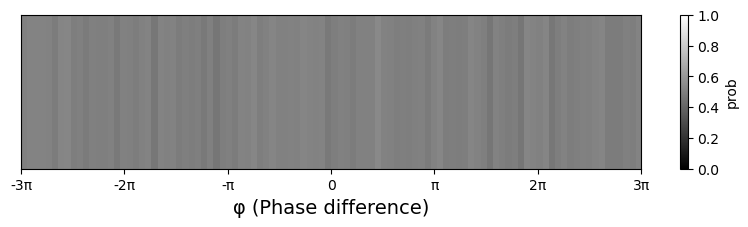

In [53]:
œÜ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

œÜ_hit = []
dist = sampler.run([(qc_isa, œÜ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(œÜ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        œÜ_hit.append(result['0']/1000)
    else:
        œÜ_hit.append(0)

œÜ_hit_2d = np.array(œÜ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(œÜ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('œÜ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3œÄ', '-2œÄ', '-œÄ', '0', 'œÄ', '2œÄ', '3œÄ'])
plt.yticks([])  
plt.show()

In [ ]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 ÌÅêÎπó, 2 Í≥†Ï†Ñ ÎπÑÌä∏

    # --- Í≥ºÏ†ú 1 ---
    # Î≤® ÏÉÅÌÉú |Œ¶+> = (|00> + |11>)/sqrt(2) Î•º ÎßåÎìúÎäî Í≤åÏù¥Ìä∏Î•º Íµ¨ÌòÑÌïòÏÑ∏Ïöî.

    qc.h(0)
    qc.cx(0, 1)

    # --- Í≥ºÏ†ú 1 Ï¢ÖÎ£å ---
    qc.barrier()
    # Step 2a: Ïï®Î¶¨Ïä§Ïùò Ï∏°Ï†ï Î∞©Ìñ• (x=0 Ïùº Îïå Z Î∞©Ìñ•, x=1 Ïùº Îïå X Î∞©Ìñ•)
    if x == 1:
        qc.h(0) # H Í≤åÏù¥Ìä∏Î•º aÍ∞ÄÌï¥ X Î∞©Ìñ•ÏúºÎ°ú ÌöåÏ†Ñ

    ##  --- Í≥ºÏ†ú 2 ---
    # Step 2b: Î∞•Ïùò Ï∏°Ï†ï Î∞©Ìñ•

    if y == 0:
        qc.ry(-np.pi/4, 1)
    else:
        qc.ry(np.pi/4, 1)


    
    # --- Í≥ºÏ†ú 2 Ï¢ÖÎ£å ---
    qc.barrier()
    
    # Step 3: Ï∏°Ï†ï
    qc.measure([0, 1], [0, 1]) # q0 -> c0 (Ïï®Î¶¨Ïä§), q1 -> c1 (Î∞•) // 'ba' ÏàúÏÑúÎ°ú ÌëúÏãúÎê®

    return qc

In [55]:
grade_lab1_ex4(create_chsh_circuit)


Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


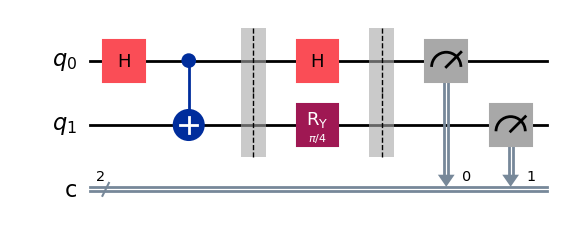

In [59]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 402, '01': 72, '10': 75, '11': 475}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 432, '01': 72, '10': 93, '11': 427}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 449, '01': 77, '10': 71, '11': 427}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 72, '01': 420, '10': 444, '11': 88}

Plotting results...


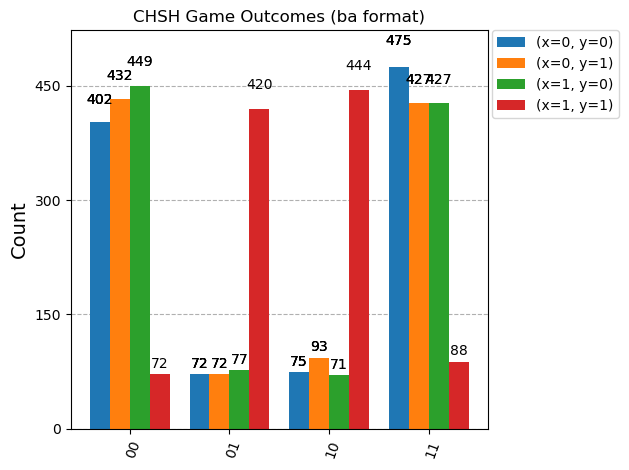

In [61]:
# AerSimulator (ÏïûÏóêÏÑú Ï†ïÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞)
# backend = AerSimulator()
# Pass manager (ÏïûÏóêÏÑú Ï†ïÏùòÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024
print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: Í≥†Ï†Ñ Î†àÏßÄÏä§ÌÑ∞Ïùò Ïù¥Î¶Ñ Í∏∞Î≥∏Í∞íÏù¥ 'c'Ïùº Îïå results_chsh[i].data.c.get_counts()
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]
print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [63]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # --- Í≥ºÏ†ú 1 ---
    # ÏäπÎ¶¨Î•º ÏúÑÌï¥ Î™©ÌëúÎ°ú ÌïòÎäî (a XOR b) Í∞íÏùÑ Íµ¨Ìï¥ Î≥ÄÏàò `target_xor_result`Ïóê Ìï†ÎãπÌïòÏÑ∏Ïöî.
    
    target_xor_result = x & y

    # --- Í≥ºÏ†ú 1 Ï¢ÖÎ£å ---

    wins_for_this_case = 0

    # --- Í≥ºÏ†ú 2 ---
    # ÏúÑÏóêÏÑú Íµ¨Ìïú ÏäπÎ¶¨ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ï∏°Ï†ï Í≤∞Í≥ºÏùò Í∞úÏàòÎ•º Î≥ÄÏàò `wins_for_this_case`Î°ú Ïπ¥Ïö¥Ìä∏ÌïòÏÑ∏Ïöî.
    
    for outcome, count in counts.items():
        b = int(outcome[0])
        a = int(outcome[1])
        if (a^b) == target_xor_result:
            wins_for_this_case += count

    # --- Í≥ºÏ†ú 2 Ï¢ÖÎ£å ---

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # ÏïΩÍ∞ÑÏùò ÏãúÎÆ¨Î†àÏù¥ÏÖò Ìé∏Ï∞®Î•º ÌóàÏö©Ìï©ÎãàÎã§
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # ÎÖ∏Ïù¥Ï¶àÎÇò Í∞ÄÎ≤ºÏö¥ Ïã§Ïàò ÎïåÎ¨∏Ïùº Ïàò ÏûàÏäµÎãàÎã§
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8564
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8389
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8555
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8438

--- Overall Performance ---
Experimental Average Win Probability: 0.8486
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8486) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [64]:
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


Full Teleportation Circuit (Check your Exercises 1, 2, 3):


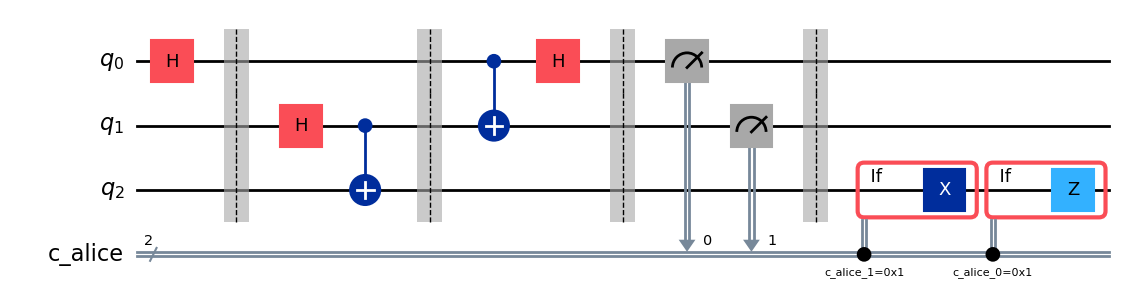

In [81]:
# ÏñëÏûê Î†àÏßÄÏä§ÌÑ∞ÏôÄ Í≥†Ï†Ñ Î†àÏßÄÏä§ÌÑ∞Î•º Ï†ïÏùòÌï©ÎãàÎã§
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # Ïï®Î¶¨Ïä§Ïùò Ï∏°Ï†ïÏóê ÏÇ¨Ïö©Îê† Î†àÏßÄÏä§ÌÑ∞

# ÎßàÏßÄÎßâÏùò ÏÉÅÌÉú Î≤°ÌÑ∞Î•º ÏßÅÏ†ë ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥ ÌöåÎ°úÏóêÏÑú Î∞•Ïùò ÌÅêÎπÑÌä∏Îäî Ï∏°Ï†ïÌïòÏßÄ ÏïäÏäµÎãàÎã§.
# ÎßåÏïΩ Ïã§Ï†ú ÌïòÎìúÏõ®Ïñ¥ÏóêÏÑú Ïã§ÌñâÌïòÏó¨ Ïπ¥Ïö¥Ìä∏Î•º ÌôïÏù∏Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞ÏóêÎäî Î∞•Ïùò Ï∏°Ï†ïÏùÑ ÏúÑÌïú ÎπÑÌä∏ÎèÑ Ï∂îÍ∞ÄÌï¥Ïïº Ìï† Í≤ÉÏûÖÎãàÎã§.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# q0Ïóê Ïï®Î¶¨Ïä§Ïùò Î©îÏÑ∏ÏßÄ ÏÉÅÌÉú |œà> = |+> Î•º Ï§ÄÎπÑÌï©ÎãàÎã§
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# --- Í≥ºÏ†ú 1 ---
# Step 1: q1(Ïï®Î¶¨Ïä§)Í≥º q2(Î∞•)Î°ú Î≤® ÌÅêÎπóÏùÑ ÎßåÎì≠ÎãàÎã§

teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])

# --- Í≥ºÏ†ú 1 Ï¢ÖÎ£å ---
teleport_qc.barrier()

# --- Í≥ºÏ†ú 2 ---
# Step 2: Ïï®Î¶¨Ïä§Í∞Ä Î≤® Ï∏°Ï†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§ (ÏñëÏûê Í≤åÏù¥Ìä∏ Î∂ÄÎ∂ÑÎßå Íµ¨ÌòÑÌï¥Ï£ºÏÑ∏Ïöî)

teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])

# --- Í≥ºÏ†ú 2 Ï¢ÖÎ£å ---
teleport_qc.barrier()

# Ïï®Î¶¨Ïä§Í∞Ä q0ÏôÄ q1 ÌÅêÎπóÏùÑ Ï∏°Ï†ïÌï©ÎãàÎã§
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# --- Í≥ºÏ†ú 3 ---
# Step 3: Î∞•Ïù¥ q2Ïóê Ï°∞Í±¥Î∂Ä Í≤åÏù¥Ìä∏Î•º Í∞ÄÌï©ÎãàÎã§
# Ï§ëÏöî: Ïù¥Ï†Ñ Qiskit Î≤ÑÏ†ÑÏóêÏÑúÏ≤òÎüº XGate()Ïóê .c_if()Î•º Ï∂îÍ∞ÄÌïòÎäî Î∞©Î≤ïÏùÄ Îçî Ïù¥ÏÉÅ ÏûëÎèôÌïòÏßÄ ÏïäÏäµÎãàÎã§.
# Qiskit 1.0 Ïù¥ÌõÑ Î≤ÑÏ†ÑÏóêÏÑú Í∂åÏû•ÌïòÎäî Î∞©Î≤ïÏùÄ ÏÉàÎ°úÏö¥ `if_test` Ïª®ÌÉùÏä§Ìä∏ Îß§ÎãàÏ†ÄÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

with teleport_qc.if_test((cr_alice_tele[1], 1)) as else_:
    teleport_qc.x(qr_tele[2])
with teleport_qc.if_test((cr_alice_tele[0], 1)) as else_:
    teleport_qc.z(qr_tele[2])

                

# --- Í≥ºÏ†ú 3 Ï¢ÖÎ£å ---

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [82]:
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! üéâ Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


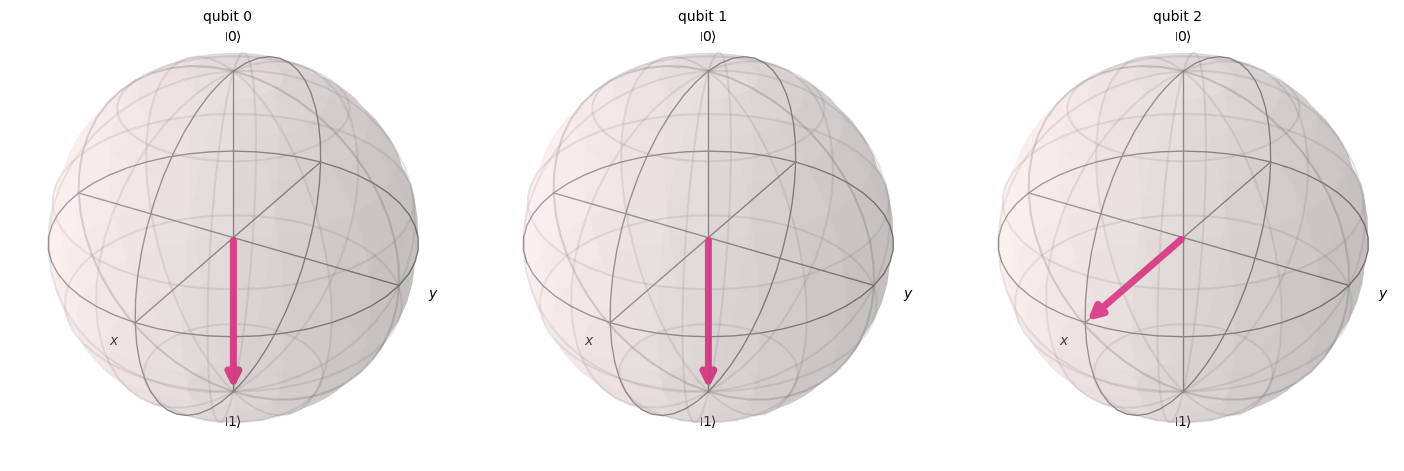

In [78]:
from qiskit.visualization import plot_bloch_multivector

# Statevector ÏãúÎÆ¨Î†àÏù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Î™ÖÌôïÌïú Íµ¨Î∂ÑÏùÑ ÏúÑÌï¥ methodÎ•º ÏßÄÏ†ïÌïòÏòÄÏäµÎãàÎã§
teleport_qc_sv = teleport_qc.copy() # ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖòÏùÑ ÏúÑÌï¥ ÌöåÎ°úÎ•º Î≥µÏÇ¨Ìï©ÎãàÎã§
teleport_qc_sv.save_statevector() # ÎßàÏßÄÎßâÏùò ÏÉÅÌÉúÎ≤°ÌÑ∞Î•º Ï†ÄÏû•Ìï©ÎãàÎã§

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # ÏÉÅÌÉúÎ≤°ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖòÏóêÏÑúÎäî Í∏∞Î≥∏ Ïã§Ìñâ ÌöüÏàòÍ∞Ä 1Ìöå ÏûÖÎãàÎã§
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0Îäî |+> ÏÉÅÌÉúÏóê ÏûàÏóàÏäµÎãàÎã§ (+X Î∞©Ìñ• Î≤°ÌÑ∞). ÌÖîÎ†àÌè¨Ìä∏ Ïù¥ÌõÑ, q2ÎèÑ |+> ÏÉÅÌÉúÏóê ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.
    # q0 ÏôÄ q1 Ïùò ÏÉÅÌÉúÎäî Ïï®Î¶¨Ïä§Í∞Ä Í¥ÄÏ∏°ÌïòÏòÄÏúºÎØÄÎ°ú Î∂ïÍ¥¥Îêú ÏÉÅÌÉúÏùº Í≤ÉÏûÖÎãàÎã§.
    
    display(plot_bloch_multivector(final_statevector)) # "TODO" Î∂ÄÎ∂ÑÏùÑ ÏßÄÏö∞Í≥† plot_bloch_multivector Ìï®ÏàòÎ°ú final_statevectorÎ•º Ï∂úÎ†•ÌïòÏÑ∏Ïöî
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

In [83]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ‚úÖ 1932 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ‚úÖ 1256 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ‚úÖ 549 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ‚úÖ 85 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ‚úÖ 0 participants have completed this lab
Functions Labs: 0/8 exercises completed (0%)
    ‚úÖ 0 participants have completed this lab
